In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics, CairoMakie

In [3]:
function HR_mem(u, p, t)
    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + memristor(z, k1_me, k2_me)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + memristor(z, k1_me, k2_me)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1 - x2
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [4]:
tstep = 0.01
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= -0.17; k2 = -0.17;
k1_me = 0.0
k2_me = 0.0

0.0

In [5]:
u0 = [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k1_me, k2_me];
ds = CoupledODEs(HR_mem, u0, p, diffeq = integ_set)

7-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR_mem
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.01)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.0, 0.0]
 time:          0.0
 state:         [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0, 0.0]


In [6]:
k2_merange = range( 0.0, 1.0, length = 100 )

idx_control_parameter = 12

idx_fix = 2; fixed_value = -5.0
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-15, atol = 1e-20)
pmap = PoincareMap(ds, surface, rootkw = setting_root)

7-dimensional PoincareMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  HR_mem
 hyperplane:    (2, -5.0)
 crossing time: 2.5740921731812327
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.0, 0.0]
 time:          0
 state:         [-0.6967185700447003, -5.0, 0.24540001739912687, -0.7413643198067131, -5.296892945456178, 0.2479281789285486, -0.04673199379774096]


In [7]:
idx_save = 1
output = orbitdiagram(pmap, idx_save, idx_control_parameter, k2_merange; n = 500, Ttr = 500);

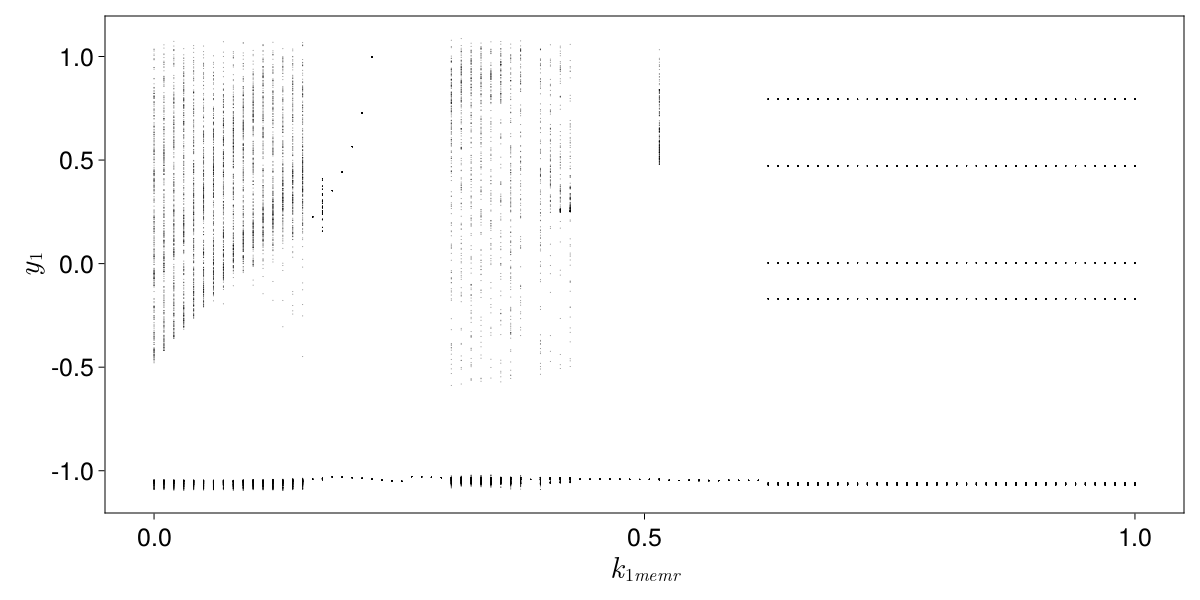

In [8]:
f = Figure(resolution = (1200, 600))
axis = Axis(f[1,1]; xlabel = L"k_{1memr}", ylabel = L"y_1", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(k2_merange)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5, marker = :circle)
end
f